# Prediction-Oriented Algorithms


In this lecture, we introduce supervised learning methods that induces
data-driven interaction of the covariates.
The interaction makes the covariates much more flexible
to capture the subtle feature in the data.
However, insufficient theoretical understanding is shed little light on these methods due to
the complex nature, so they are often viewed by theorists as "black-boxes" methods.
In real applications, when the machines are carefully tuned, they
can achieve surprisingly superior performance.
@gu2018empirical showcase a horse race of a myriad of methods,
and the general message is that interaction helps with forecast in
the financial market.
In the meantime, industry insiders are pondering whether these methods are "alchemy"
which fall short of scientific standard. Caution must be exercised when
we apply these methods in empirical economic analysis.






## Regression Tree and Bagging

We consider supervised learning setting in which we use $x$ to predict $y$.
It can be done by traditional nonparametric methods such as kernel regression.
*Regression tree* [@breiman1984classification] is an alternative to kernel regression. Regression tree  recursively partitions the
the space of the regressors. The algorithm is easy to describe: each time a covariate is split into two dummies, and the splitting criterion is aggressive reduction of the SSR. In the formulate of the SSR, the fitted value is computed as the average of $y_i$'s in a partition.

The tuning parameter is the depth of the tree, which is referred to the number of splits.
Given a dataset $d$ and the depth of the tree, the fitted regression tree $\hat{r}(d)$ is completely determined by the data.

The problem of the regression tree is its instability. For data generated
from the same data generating process (DGP), the  covariate chosen to be split and the splitting point can
vary widely and they heavily influence the path of the partition.

*Bootstrap averaging*, or *bagging* for short, was introduced to reduce the
variance of the regression tree [@breiman1996bagging]. Bagging grows a regression tree for
each bootstrap sample, and then do a simple average. Let $d^{\star b}$
be the $b$-th bootstrap sample of the original data $d$, and then the
bagging estimator is defined as

$$
\hat{r}_{\mathrm{bagging}} = B^{-1} \sum_{b=1}^B \hat{r}( d^{\star b} ).
$$

Bagging is an example of the *ensemble learning*.

@inoue2008useful is an early application of bagging in time series forecast.
@hirano2017forecasting provide a theoretical perspective on the risk reduction of bagging.


## Random Forest

*Random forest* [@breiman2001random] shakes up the regressors by randomly sampling $m$ out of the total $p$ covarites before *each split of a tree*.
The tuning parameters in random forest
is the tree depth and $m$. Due to the "de-correlation" in sampling the regressors, it in
general performs better than bagging in prediction exercises.

Below is a very simple real data example of random forest using the
Boston Housing data.


Loading required package: randomForest

Warning message:
"package 'randomForest' was built under R version 4.2.2"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: MASS

Warning message:
"package 'MASS' was built under R version 4.2.2"


,IncNodePurity
crim,1373.07707
zn,247.35123
indus,1326.18996
chas,47.87453
nox,1527.38467
rm,6075.29521
age,1031.69446
dis,1551.31102
rad,164.36409
tax,788.77341


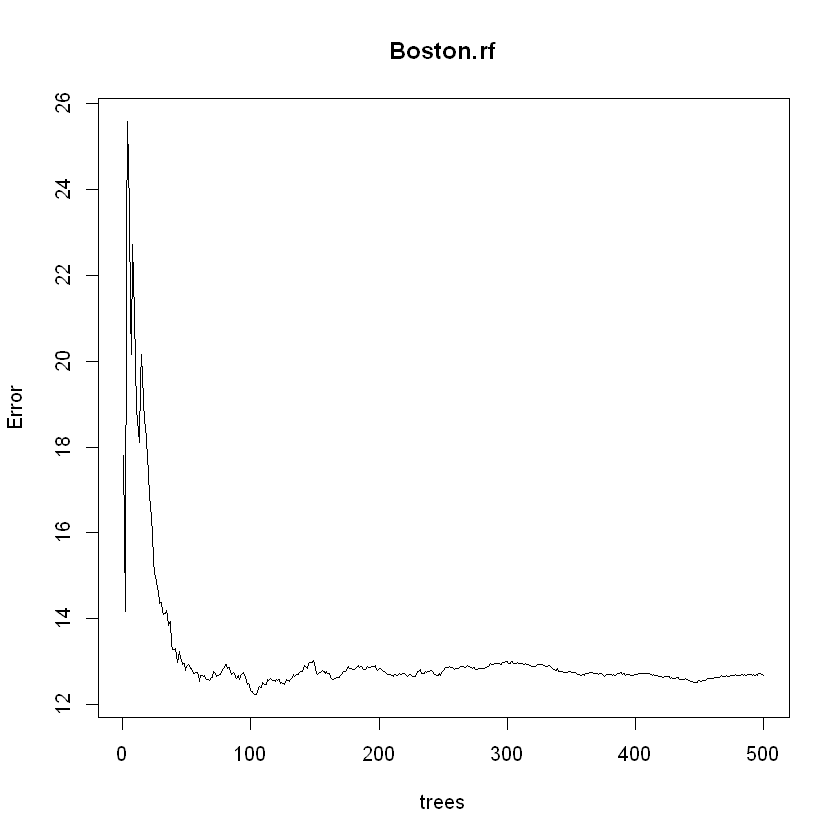

In [1]:
from randomForest import RandomForestRegressor
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

# Load the Boston housing dataset
boston = load_boston()

# Set a random seed
np.random.seed(101)

# Create a training sample with 300 observations
train = np.random.choice(range(boston.data.shape[0]), size=300, replace=False)

# Fit a random forest regression model to the training data
rf = RandomForestRegressor(n_estimators=500, random_state=101)
rf.fit(boston.data[train], boston.target[train])

# Plot the feature importances
plt.bar(range(boston.data.shape[1]), rf.feature_importances_)
plt.xticks(range(boston.data.shape[1]), boston.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()



Despite the simplicity of the algorithm, the consistency of random forest is not proved
until @scornet2015consistency, and
inferential theory was first established by
@wager2018estimation  in the context of treatment effect estimation.
@athey2019generalized generalizes CART to local maximum likelihood.





**Example**: Random forest for Survey of Professional Forecasters in `data_example/SPF_RF.R` from @cheng2020survey. The script uses `caret` framework.


## Gradient Boosting

Bagging and random forest almost always use equal weight on each generated tree
 for the ensemble.
Instead, *tree boosting* takes a distinctive scheme to determine the ensemble weights.
It is a deterministic approach that does not resample the original data.

1. Use the original data $d^0=(x_i,y_i)$ to grow a shallow tree $\hat{r}^{0}(d^0)$. Save the prediction $f^0_i = \alpha \cdot \hat{r}^0 (d^0, x_i)$ where
$\alpha\in [0,1]$ is a shrinkage tuning parameter. Save
the residual $e_i^{0} = y_i - f^0_i$. Set $m=1$.
2. In the $m$-th iteration, use the data $d^m = (x_i,e_i^{m-1})$ to grow a shallow tree $\hat{r}^{m}(d^m)$. Save the prediction $f^m_i =  f^{m-1}_i +  \alpha \cdot \hat{r}^m (d, x_i)$. Save
the residual $e_i^{m} = y_i - f^m_i$. Update $m = m+1$.
3. Repeat Step 2 until $m > M$.

In this boosting algorithm there are three tuning parameters: the tree depth,  the shrinkage level $\alpha$, and the number of iterations $M$.
The algorithm can be sensitive to all the three tuning parameters.
When a model is tuned well, it often performs remarkably.
For example, the script `Beijing_housing_gbm.R` achieves much higher out-of-sample $R^2$ than OLS, reported in @lin2020. This script implements boosting via the package `gbm`, which stands for "Gradient Boosting Machine."



There are many variants of boosting algorithms. For example, $L_2$-boosting, componentwise boosting, and AdaBoosting, etc. Statisticians view boosting as a gradient descent algorithm to reduce the risk. The fitted
tree in each iteration is the deepest descent direction, while the shrinkage tames the fitting to avoid proceeding too aggressively.


* @shi2016econometric proposes a greedy algorithm in similar spirit to boosting for moment selection in GMM.
* @phillips2019boosting uses $L_2$-boosting as a boosted version of the Hodrick-Prescott filter.
* @shi2019forward






## Neural Network

A neural network is the workhorse behind Alpha-Go and self-driven cars.
However, from a statistician's point of view it is just a particular type of nonlinear models.
Figure 1 illustrates a one-layer neural network, but in general there can be several layers.
The transition from layer $k-1$ to layer $k$ can be written as

$$
\begin{align*}
z_l^{(k)} & =  w_{l0}^{(k-1)} + \sum_{j=1}^{p_{k-1} } w_{lj}^{(k-1)} a_j^{(k-1)} \\ 
a_l^{(k)} & =  g^{(k)} ( z_l^{(k)}),
\end{align*}
$$

where $a_j^{(0)}  = x_j$  is the input,  $z_l^{(k)}$ is the $k$-th hidden layer, 
and all the $w$s are coefficients to be estimated.
The above formulation shows that  $z_l^{(k)}$ usually takes a linear form,
while the *activation function* $g(\cdot)$ can be an identity function or a simple nonlinear function.
Popular choices of the activation function are sigmoid ($1/(1+\exp(-x))$) and rectified linear unit (ReLu, $z\cdot 1\{x\geq 0\}$), etc.


![A Single Layer Feedforward Neural Network (from Wiki)](graph/Colored_neural_network.png)





A user has several decisions to make when fitting a neural network:
besides the activation function,
the tuning parameters are the number of hidden layers and the number of nodes in each layer.
Many free parameters are generated from the multiple layer and multiple nodes,
and in estimation often regularization methods are employed to penalize
the $l_1$ and/or $l_2$ norms, which requires extra tuning parameters.
`data_example/Keras_ANN.R` gives an example of a neural network
with two hidden layers, each has 64 nodes, and the ReLu activation function.




Due to the nonlinear nature of the neural networks, theoretical understanding about its behavior is still scant. One of the early contributions came from econometrician: @hornik1989multilayer
(Theorem 2.2) show that a single hidden layer neural network, given enough many nodes, is a *universal approximator* for any
measurable function.


After setting up a neural network, the free parameters must be determined by
numerical optimization. The nonlinear complex structure makes the optimization
very challenging and the global optimizer is beyond guarantee.
In particular, when the sample size is big, the de facto optimization algorithm
is the stochastic gradient descent.

Thanks to computational
scientists, Google's `tensorflow` is a popular backend of
neural network estimation, and `keras` is the deep learning modeling language.
Their relationship is similar to `Mosek` and `CVXR`.





## Stochastic Gradient Descent

In optimization we update the $D$-dimensional parameter

$$
\beta_{k+1} = \beta_{k} + a_k p_k,
$$

where $a_k \in \mathbb{R}$ is the step length and $p_k\in \mathbb{R}^D$ is a vector
of directions. Use a Talyor expansion,

$$
f(\beta_{k+1}) = f(\beta_k + a_k p_k ) \approx f(\beta_k) + a_k \nabla f(\beta_k) p_k,
$$

If in each step we want the value of the criterion function
$f(x)$ to decrease, we need $\nabla f(\beta_k) p_k \leq 0$.
A simple choice is $p_k =-\nabla f(\beta_k)$, which is called the deepest decent.
Newton's method corresponds to $p_k =- (\nabla^2 f(\beta_k))^{-1}  \nabla f(\beta_k)$,
and BFGS uses a low-rank matrix to approximate $\nabla^2 f(\beta_k)$. The linear search is a one-dimensional problem and it can be handled by either exact minimization or backtracking. Details of the descent method is referred to Chapter 9.2--9.5 of @boyd2004convex.

When the sample size is huge and the number of parameters is also big,
the evaluation of the gradient can be prohibitively expensive.
Stochastic gradient descent (SGD) uses a small batch of the sample
to evaluate the gradient in each iteration. It can significantly save
computational time. It is the *de facto* optimization procedure in complex optimization problems such as
training a neural network.

However, SGD involves tuning parameters (say, the batch size and the learning rate. Learning rate replaces the step length $a_k$ and becomes a regularization parameter.)
that can dramatically affect
the outcome, in particular in nonlinear problems.
Careful experiments must be carried out before serious implementation.

Below is an example of SGD in the PPMLE that we visited in the lecture of optimization, now with sample size 100,000 and
the number of parameters 100. SGD is usually much faster than `nlopt`.

The new functions are defined with the data explicitly as arguments.
Because in SGD each time the log-likelihood function and the gradient are
evaluated at a different subsample.


In [2]:
import numpy as np

def poisson_loglik(b, y, X):
    b = np.asmatrix(b)
    lambda_ = np.exp(X @ b)
    ell = -np.mean(-lambda_ + y * np.log(lambda_))
    return ell

def poisson_loglik_grad(b, y, X):
    b = np.asmatrix(b)
    lambda_ = np.exp(X @ b)
    ell = -np.mean((-lambda_ * X) + (y * X), axis=0)
    ell_eta = np.asarray(ell).squeeze()
    return ell_eta


## Explanation 

In the poisson_loglik() function, we're using the np.exp() function in NumPy to compute the exponential of the matrix product X %*% b in R. We're also using the np.mean() function in NumPy to compute the mean of the negative Poisson log-likelihood.

In the poisson_loglik_grad() function, we're computing the gradient of the negative Poisson log-likelihood with respect to the coefficients b. We're using the np.mean() function in NumPy with the axis parameter set to 0 to compute the column means of the gradient. We're also using the np.asarray() and squeeze() functions in NumPy to convert the gradient matrix to a one-dimensional NumPy array.



In [7]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

np.random.seed(898)
nn = 100000
K = 100
X = np.column_stack([np.ones(nn), np.random.rand(nn, K-1)])
b0 = np.repeat(1, K) / K
y = np.random.poisson(np.exp(np.dot(X, b0)))

b_init = np.random.rand(K)
b_init = 2 * b_init / sum(b_init)

n = len(y)
test_ind = np.random.choice(np.arange(n), size=int(0.2*n), replace=False)

y_test = y[test_ind]
X_test = X[test_ind, :]
y_train = y[np.setdiff1d(np.arange(n), test_ind)]
X_train = X[np.setdiff1d(np.arange(n), test_ind), :]

lasso_cv = LassoCV(cv=10)
lasso_cv.fit(X_train, y_train)
b_lasso_cv = lasso_cv.coef_
y_pred = np.dot(X_test, b_lasso_cv)
mse_lasso_cv = mean_squared_error(y_test, y_pred)

print("LassoCV results:")
print("lambda.min: ", lasso_cv.alpha_)
print("MSE: ", mse_lasso_cv)



LassoCV results:
lambda.min:  0.0012741951349030628
MSE:  3.495033563685301


## Explanation

1.The code imports the necessary modules: numpy for numerical computing, LassoCV from sklearn.linear_model for Lasso regularization with cross-validation, and mean_squared_error from sklearn.metrics to compute the mean squared error.

2.A random seed is set to make the results reproducible.

3.The code sets the number of observations nn and the number of predictors K.

4.The code generates a design matrix X with nn rows and K columns, where the first column is all ones (for the intercept) and the remaining columns are filled with random values between 0 and 1. The true coefficients b0 are set to have equal weights of 1/K, and the response vector y is generated from a Poisson distribution with a mean of exp(Xb0).

5.The code splits the data into training and testing sets by randomly selecting 20% of the observations for the test set.

6.The code initializes the coefficients b_init to random values between 0 and 1 and normalizes them so that they sum to 2 (for stability). The training and testing data are separated into X_train, y_train, X_test, and y_test.

7.The code fits a LassoCV model with 10-fold cross-validation on the training set using the LassoCV function from scikit-learn. The alpha_ attribute of the resulting model gives the value of the regularization parameter that minimizes the cross-validation error, which is printed to the console. The coefficients b_lasso_cv are also stored.

8.The code computes the mean squared error on the test set by multiplying the test design matrix X_test by the estimated coefficients b_lasso_cv and computing the mean


In [21]:
# optimization parameters
# sgd depends on
# * eta: the learning rate
# * epoch: the averaging small batch
# * the initial value
# install nlopt
# import sys
# !{sys.executable} -m pip install nlopt
# upgrade numpy
# !pip install --upgrade numpy==1.24.2

import numpy as np
import nlopt
import time

# optimization parameters
# sgd depends on
# * eta: the learning rate
# * epoch: the averaging small batch
# * the initial value

max_iter = 5000
min_iter = 20
eta = 0.01
K = 10  # define K
epoch = round(100 * np.sqrt(K))

b_init = np.zeros(K)  # define b_init
b_old = b_init

pts0 = time.time()

for i in range(1, max_iter+1):
    loglik_old, grad_old = poisson_loglik(b_old, None, y_train, X_train)
    i_sample = np.random.choice(np.arange(len(y_train)), epoch, replace=True)
    b_new = b_old - eta * grad_old[i_sample]
    loglik_new, _ = poisson_loglik(b_new, None, y_test, X_test)
    b_old = b_new  # update

    criterion = loglik_old - loglik_new

    if criterion < 0.0001 and i >= min_iter:
        break
print("point estimate =", b_new, ", log_lik = ", loglik_new, "\n")
pts1 = time.time() - pts0
print(pts1)

# Nelder-Mead method is too slow for this dataset
# thus we only sgd with NLoptr
opts = {
    'algorithm': 'NLOPT_LD_SLSQP',
    'xtol_rel': 1.0e-7,
    'maxeval': 5000
}

pts0 = time.time()
res_BFGS = nlopt.opt(nlopt.LD_SLSQP, len(b_init))  # fix length of parameter vector
res_BFGS.set_lower_bounds([-np.inf] * len(b_init))
res_BFGS.set_min_objective


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core.multiarray failed to import

## Reading

* Efron and Hastie: Chapter 8, 17 and 18.

## Quotation

<!-- "The world is yours, as well as ours, but in the last analysis, it is yours. You young people, full of vigor and vitality, are in the bloom of life, like the sun at eight or nine in the morning. Our hope is placed on you." -->

<!-- ---Mao Zedong, Talk at a meeting with Chinese students and trainees in Moscow (November 17, 1957). -->

## References
